In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import numpy as np
import pycolmap
import matplotlib.pyplot as plt
from matplotlib.image import imread

from megadepth.utils.projections import backward_project, forward_project, get_camera_poses
from megadepth.utils.utils import camera_pixel_grid
from megadepth.utils.read_write_dense import read_array
from megadepth.visualization.view_projections import create_view_projection_figure,pca
from megadepth.visualization import create_all_figures

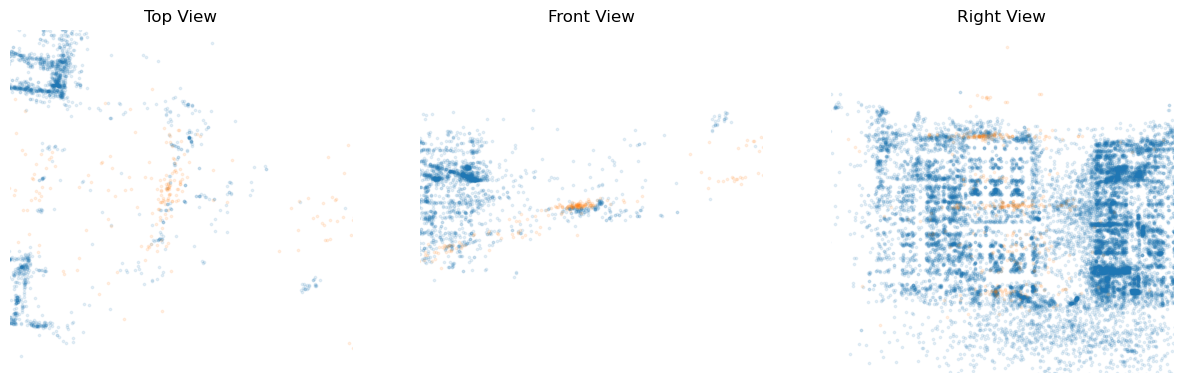

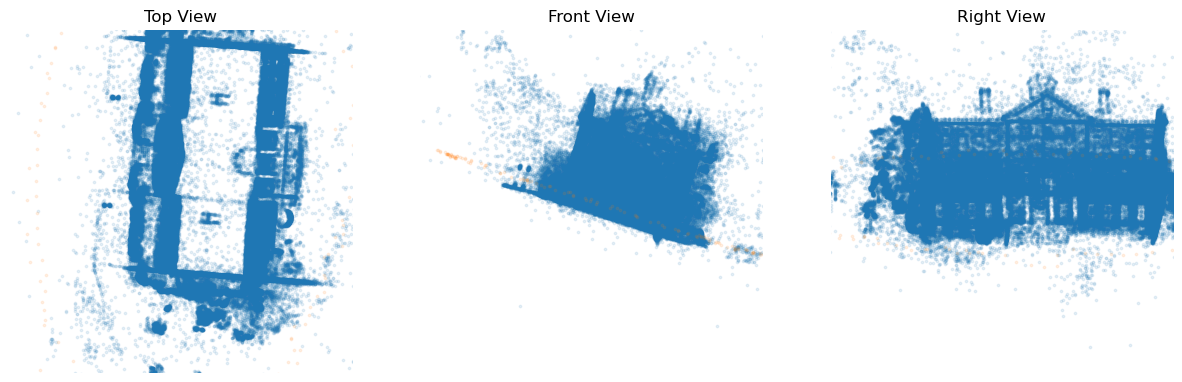

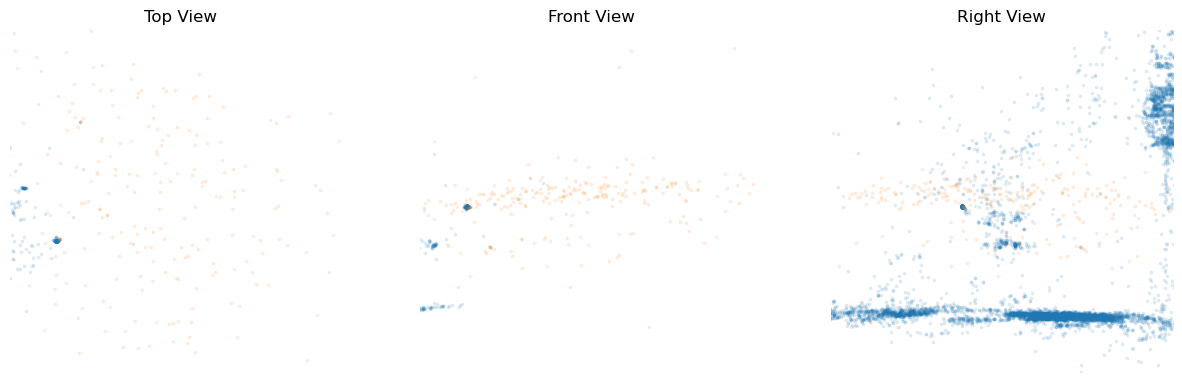

In [19]:
data_path = r"../data"
scenes = [os.path.join(data_path, f, "sparse") for f in os.listdir(data_path)]
scenes = [f for f in scenes if os.path.isdir(f)]

for scene in scenes:
    models = os.listdir(scene)
    models = [f for f in models if not f.startswith(".")]
    for model in models[:1]:

        sparse_model_path = os.path.join(scene, model)
        output_path = os.path.join(
            scene,
            "..",
            "visualizations",
            model,
        )
        # os.makedirs(output_path, exist_ok=True)
        # create_all_figures(file_path, output_path)
        reconstruction = pycolmap.Reconstruction(sparse_model_path)
        camera_poses = get_camera_poses(reconstruction)
        points = np.array([p.xyz for p in reconstruction.points3D.values()])
        align = pca(camera_poses)
        # alternative to pca
        # print(out_file)
        out_file = f"all_views_{model}.jpg"
        create_view_projection_figure(
            [align(points), align(camera_poses)], limit=3,s=3
        )


In [3]:
# load images, cameras and depth maps
dense_model_dir = os.path.join("..", "data", "0058")
image_dir = os.path.join(dense_model_dir, "images")
reconstruction = pycolmap.Reconstruction(os.path.join(dense_model_dir, "sparse","sift-NN-ratio-netvlad-50"))

In [4]:
camera_poses = get_camera_poses(reconstruction)

In [5]:
points = np.array([p.xyz for p in reconstruction.points3D.values()])
align = pca(camera_poses)

### Sparse Reconstruction

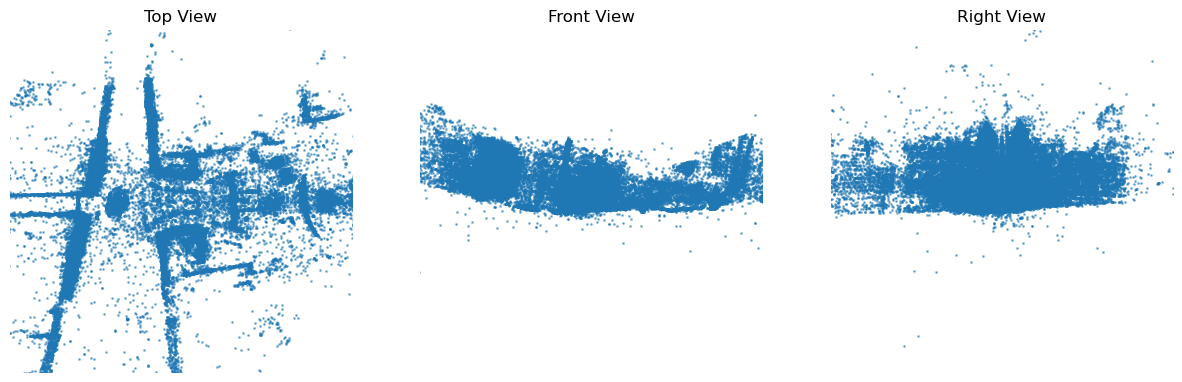

In [7]:
create_view_projection_figure([align(points)], limit=3)

### Camera Poses

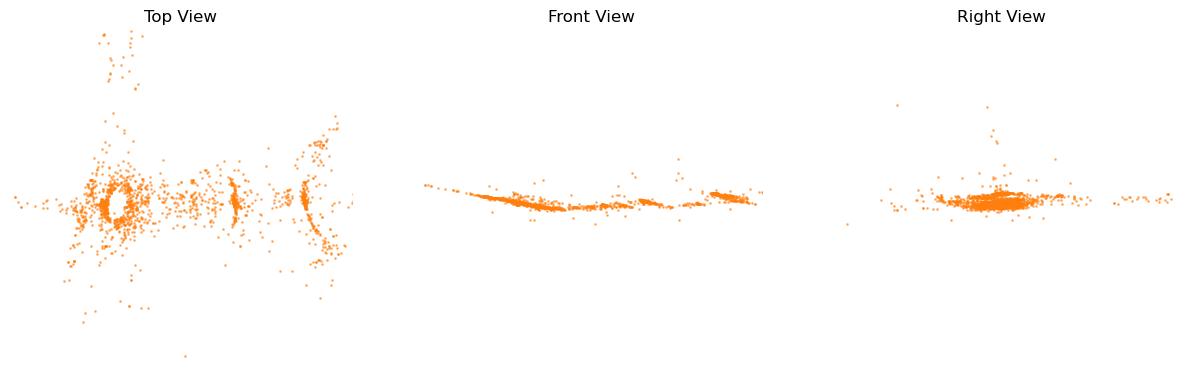

In [8]:
create_view_projection_figure(
    [np.zeros((0,3)), align(camera_poses)], limit=3)

### Camaras and Reconstruction

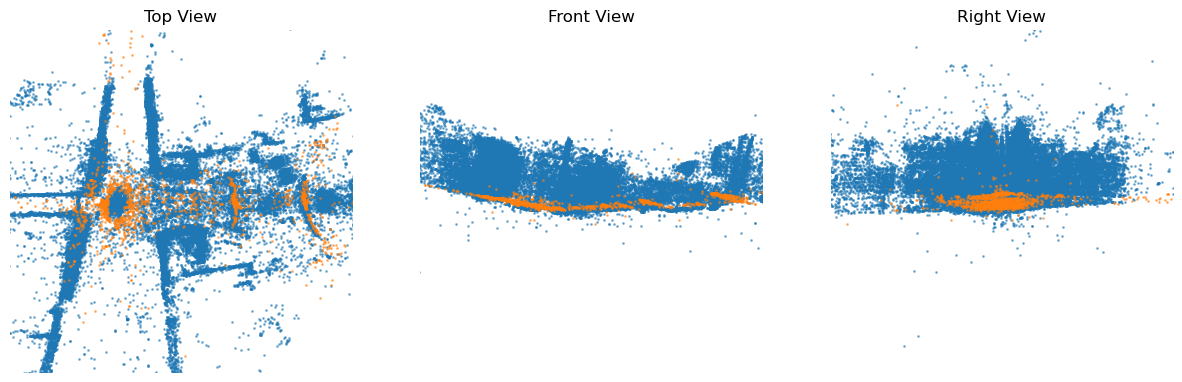

In [9]:
create_view_projection_figure(
    [align(points),align(camera_poses)], limit=3)

In [10]:
# saving plots
create_view_projection_figure(
    [align(points),align(camera_poses)],
    view=0,limit=3,alpha=0.2,path=r"fig.jpg")
